<a href="https://colab.research.google.com/github/saraswathykrk/ml_work/blob/main/BPP_Sentiment_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')

In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 4.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import os
# os.chdir("/content/drive/My Drive/")

In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")


In [ ]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
ls

sample_data/


In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)
filename = next(iter(uploaded))
print(filename)
data = pd.read_csv(filename) #"Dataset.csv")

Saving Dataset (1).csv to Dataset (1).csv
{'Dataset (1).csv': b"Video ID,Comment ID,comments\nX0QqhFn8HC8,UgzXdPa8VDAONLbcze14AaABAg,It  seems  beautiful    But  it's  not  really  good  to  do  in  outdoors  or  in  terrace  as  it  get  dirty  and  dusty  very  soon    Good  for  few  days  only  \nX0QqhFn8HC8,Ugy02yrrzpOdJpKYqPN4AaABAg,This  will  work  for  indoor  balcony    It  is  not  suitable  for  terrace  as  it  will  be  exposed  to  bad  weather\nX0QqhFn8HC8,Ugw1hcO3btXLPL-d1Ot4AaABAg,oh  my  my  such  a  beautiful  transformation    you  are  very  creative  person      thanks  for  sharing  your  idea  with  us  take  care\nX0QqhFn8HC8,Ugw9zPJZJ1d4-dHUbJV4AaABAg,Best  part  is  she  is  not  wasting  time  in  talking  nd  explaining  like  mostly  transformation  vedios  \nX0QqhFn8HC8,UgxNSYUqKZ-fFDIqp3x4AaABAg,Beautiful  garden    Can't  see  this  garden  outsiders  \nX0QqhFn8HC8,Ugy48-Rak38JOAHG90N4AaABAg,This  would  be  an  awesome  garden  in  a  small  balcony  

In [ ]:
data.head()

,Video ID,Comment ID,comments
0,X0QqhFn8HC8,UgzXdPa8VDAONLbcze14AaABAg,It seems beautiful But it's not really...
1,X0QqhFn8HC8,Ugy02yrrzpOdJpKYqPN4AaABAg,This will work for indoor balcony It ...
2,X0QqhFn8HC8,Ugw1hcO3btXLPL-d1Ot4AaABAg,oh my my such a beautiful transformation...
3,X0QqhFn8HC8,Ugw9zPJZJ1d4-dHUbJV4AaABAg,Best part is she is not wasting time i...
4,X0QqhFn8HC8,UgxNSYUqKZ-fFDIqp3x4AaABAg,Beautiful garden Can't see this garden ...


In [ ]:
data.shape

(429, 3)

In [ ]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity
0,X0QqhFn8HC8,UgzXdPa8VDAONLbcze14AaABAg,It seems beautiful But it's not really...,0.0250
1,X0QqhFn8HC8,Ugy02yrrzpOdJpKYqPN4AaABAg,This will work for indoor balcony It ...,-0.4875
2,X0QqhFn8HC8,Ugw1hcO3btXLPL-d1Ot4AaABAg,oh my my such a beautiful transformation...,0.4250
3,X0QqhFn8HC8,Ugw9zPJZJ1d4-dHUbJV4AaABAg,Best part is she is not wasting time i...,0.7500
4,X0QqhFn8HC8,UgxNSYUqKZ-fFDIqp3x4AaABAg,Beautiful garden Can't see this garden ...,0.8500


## Shuffle the dataset

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data['pol_cat']  = 0

Continuous to categorical

In [ ]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1


In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,X0QqhFn8HC8,Ugwh9Aq_Kewa3Ip4QkR4AaABAg,Hey make the video with voice over maam...,0.000,-1
1,X0QqhFn8HC8,Ugyx5yzPaDBxji5AitF4AaABAg,Beautiful How many Rs this grass lawn,0.675,1
2,X0QqhFn8HC8,UgyRCRjOT_t7CG2SN9N4AaABAg,Its beautifull my mom would definately l...,0.500,1
3,X0QqhFn8HC8,Ugxvwd-acEfWBE9Kkg14AaABAg,wow very nice sharing dear stay connected,0.440,1
4,X0QqhFn8HC8,UgyYcIZ3NLQKB-Ybx454AaABAg,I became a fan of the video and ...,0.000,-1


In [ ]:
data['pol_cat'].value_counts()

 1    287
-1    142
Name: pol_cat, dtype: int64

Create separate dataframes for Negative,Positive & Neutral comments 

In [ ]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [ ]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,X0QqhFn8HC8,Ugyx5yzPaDBxji5AitF4AaABAg,Beautiful How many Rs this grass lawn,0.675,1
1,X0QqhFn8HC8,UgyRCRjOT_t7CG2SN9N4AaABAg,Its beautifull my mom would definately l...,0.500,1
2,X0QqhFn8HC8,Ugxvwd-acEfWBE9Kkg14AaABAg,wow very nice sharing dear stay connected,0.440,1
3,X0QqhFn8HC8,Ugx1LNru60I5hUbIFZN4AaABAg,Such a beautiful work,0.425,1
4,X0QqhFn8HC8,Ugxx_EpilknHAulTc_t4AaABAg,wonderful greetings from Germany,1.000,1


In [ ]:
data_pos.shape

(287, 5)

In [ ]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,X0QqhFn8HC8,Ugwh9Aq_Kewa3Ip4QkR4AaABAg,Hey make the video with voice over maam...,0.0,-1
1,X0QqhFn8HC8,UgyYcIZ3NLQKB-Ybx454AaABAg,I became a fan of the video and ...,0.0,-1
2,X0QqhFn8HC8,UgycNmaTiUQAPayuW2h4AaABAg,Please stop using non biodegradable mater...,0.0,-1
3,X0QqhFn8HC8,UgyXHYp-cV2n1la6Ub14AaABAg,I ll try at my home as it is,0.0,-1
4,X0QqhFn8HC8,Ugw6-jNM9loKf8JutkF4AaABAg,Those wooden tiles which u ordered won't...,0.0,-1


In [ ]:
data_neg['comments'][40]

'Do  u  have  a  shade  overhead    How  do  you  manage  during  heavy  rains    What  paint  did  u  use  for  the  terrace  floor  '

 1    287
-1    142
Name: pol_cat, dtype: int64

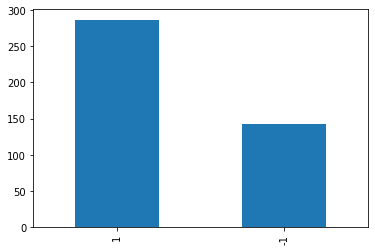

In [ ]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

## Data Preprocessing

Lower the text in comments

In [ ]:
data['comments'] = data['comments'].str.lower()

In [ ]:
data['comments'].head()

0    hey  make  the  video  with  voice  over  maam...
1        beautiful    how  many  rs  this  grass  lawn
2    its  beautifull  my  mom  would  definately  l...
3    wow  very  nice  sharing  dear  stay  connected  
4    i  became  a  fan  of  the  video        and  ...
Name: comments, dtype: object

In [ ]:
data.describe()

,polarity,pol_cat
count,429.000000,429.000000
mean,0.343804,0.337995
std,0.366466,0.942247
min,-0.650000,-1.000000
25%,0.000000,-1.000000
50%,0.350000,1.000000
75%,0.633333,1.000000
max,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    429 non-null    object 
 1   Comment ID  429 non-null    object 
 2   comments    429 non-null    object 
 3   polarity    429 non-null    float64
 4   pol_cat     429 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 16.9+ KB


In [ ]:
data['comments'][0]

"hey  make  the  video  with  voice  over  maam  it's  helpful  "

In [ ]:
data['comments'][0].strip()

"hey  make  the  video  with  voice  over  maam  it's  helpful"

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
data['comments'] = data['comments'].str.strip()

In [ ]:
train = data.copy()

In [ ]:
train['comments'] = train['comments'].str.strip()

In [ ]:
train['comments'][0]

"hey  make  the  video  with  voice  over  maam  it's  helpful"

In [ ]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [ ]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [ ]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,X0QqhFn8HC8,Ugwh9Aq_Kewa3Ip4QkR4AaABAg,hey make the video with voice over maam...,0.000,-1,hey make video voice maam 's helpful
1,X0QqhFn8HC8,Ugyx5yzPaDBxji5AitF4AaABAg,beautiful how many rs this grass lawn,0.675,1,beautiful many rs grass lawn
2,X0QqhFn8HC8,UgyRCRjOT_t7CG2SN9N4AaABAg,its beautifull my mom would definately l...,0.500,1,beautifull mom would definately love
3,X0QqhFn8HC8,Ugxvwd-acEfWBE9Kkg14AaABAg,wow very nice sharing dear stay connected,0.440,1,wow nice sharing dear stay connected
4,X0QqhFn8HC8,UgyYcIZ3NLQKB-Ybx454AaABAg,i became a fan of the video and ...,0.000,-1,became fan video subscribed ur channel


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [ ]:
X_train.shape

(343,)

In [ ]:
X_test.shape

(86,)

In [ ]:
data['pol_cat'].value_counts()

 1    287
-1    142
Name: pol_cat, dtype: int64

## Gonna Apply Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [ ]:
tf_train.shape

(343, 827)

### Print the Vocabulary

In [ ]:
print(vect.vocabulary_)

{'watched': 785, '1st': 2, 'video': 770, 'subscribed': 691, 'creative': 162, 'mind': 471, 'barish': 72, 'kya': 402, 'hoga': 324, 'wow': 814, 'great': 291, 'thanks': 720, 'sharing': 639, 'try': 749, 'awesome': 60, 'good': 287, 'job': 371, 'medam': 467, 'brilliant': 99, 'apnae': 38, 'artificial': 50, 'grass': 290, 'ke': 385, 'price': 571, 'kitnae': 395, 'wish': 799, 'amit': 29, 'also': 23, 'helped': 314, 'superb': 701, 'much': 481, 'cost': 152, 'work': 810, 'indoor': 351, 'balcony': 70, 'suitable': 695, 'terrace': 718, 'exposed': 238, 'bad': 65, 'weather': 790, 'need': 498, 'spend': 667, 'crores': 164, 'buy': 107, 'luxurious': 435, 'house': 336, 'made': 438, 'nice': 503, 'big': 89, 'thumbs': 729, 'god': 282, 'bless': 95, 'liked': 414, 'brought': 101, 'pot': 566, 'angles': 31, 'really': 595, 'garden': 270, 'natural': 494, 'loved': 431, 'paint': 525, 'kind': 394, 'share': 638, 'wel': 791, 'hey': 318, 'hi': 319, 'looking': 426, 'transformation': 744, 'seen': 628, 'pots': 567, 'wall': 778, '

In [ ]:
vocab = vect.vocabulary_

In [ ]:
# for key,value in vocab.items():
#     if(value == 162):
#         print(key)

import the logistic regression classifer and fit on the training dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

###  Accuracy score on training dataset

In [ ]:
lr.score(tf_train,y_train)

0.9941690962099126

### Accuracy score on test dataset i.e got from the splitting

In [ ]:
lr.score(tf_test,y_test)

0.8488372093023255

### Make predictions on the test dataset i.e. unseen data to the model

In [ ]:
expected = y_test
predicted = lr.predict(tf_test)

### plot confusion matrix for the test dataset

In [ ]:

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pip install mlxtend

[[53  8]
 [ 5 20]]


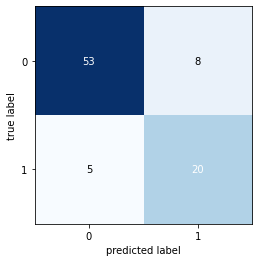

In [ ]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.71      0.80      0.75        25
           1       0.91      0.87      0.89        61

    accuracy                           0.85        86
   macro avg       0.81      0.83      0.82        86
weighted avg       0.86      0.85      0.85        86



### find the F1 score

In [ ]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.822736641826542